In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import os
import cv2
import joblib
import random

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

import numpy.random as rng
from keras import initializers
from keras import backend as K
from keras.regularizers import l2

/home/jafar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATADIR="/home/jafar/Desktop/Master/jafar/Sem4/Rock Classification/withManyClass/images/800"
#CATEGORIES=["Aaaa", "interflw","pahoehoe","transi"]
#CATEGORIES=["Aaa_enta","Aaa_lava ball","inter_brown","inter_red","pa_domed vesicle","pa_gas cavity","pa_inflection1","pa_inflection2","pa_joints","pa_pipes","pa_pipes and vesicles","pa_ropes","pa_squeezeup","pa_sq up","pa_toes","pa_vesicle banding","pa_vesicle cyl","tr_ftb 800","tr_rubbly","tr_slabby"]

CATEGORIES=[
'Aaa_enta','Aaa_lava ball',
'inter_brown','inter_red',
'pa__hummocky_inflection1','pa_hummocky_inflection2','pa_hummocky_ropes',
'pa_hummocky_squeezeup','pa_hummocky_toes',
'pa_sheet_domed vesicle','pa_sheet_gas cavity','pa_sheet_joints',
'pa_sheet_pipes and vesicles','pa_sheet_sq up','pa_sheet_vesicle banding','pa_sheet_vesicle cyl',
'tr_ftb 800','tr_rubbly','tr_slabby']
numclass=len(CATEGORIES)

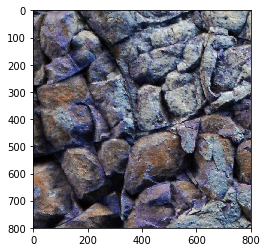

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

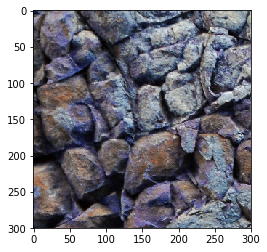

In [4]:
IMG_SIZE=300
new=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)
plt.show()

In [5]:
#img_array


In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            #print(np.shape(img_array) ,class_num)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
            
create_training_data()


for i in training_data:
    #print(i)
    height, width = i.shape[:2]
    break

In [7]:
random.shuffle(training_data)
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

Int64Index([12, 0, 11, 16, 9, 17, 8, 14, 4, 1, 18, 2, 10, 13, 5, 6, 3, 15, 7], dtype='int64')


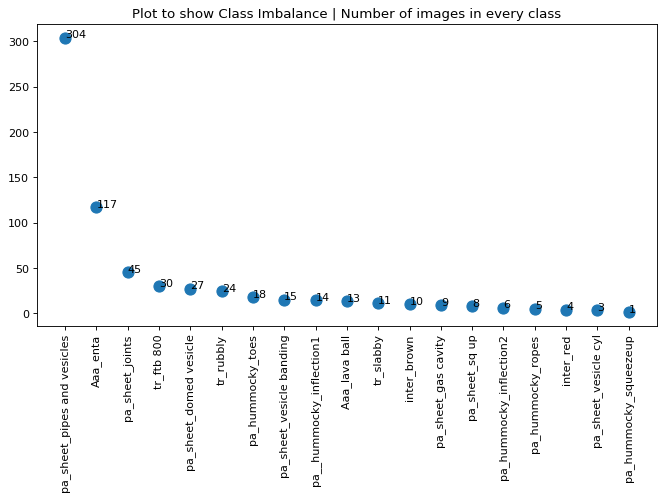

In [8]:
Y=pd.Series(y)

class_counts=Y.value_counts()
print(class_counts.index)
cats=pd.Series(CATEGORIES).iloc[class_counts.index]

fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

#plt.hist(y,bins=numclass, color='#0504aa',alpha=0.7, rwidth=0.85)

plt.scatter(cats,class_counts,s=100)
for i,j in zip(cats,class_counts):
    ax.annotate(str(j),xy=(i,j))

plt.xticks(rotation=90)
plt.title("Plot to show Class Imbalance | Number of images in every class")
plt.show()

In [9]:
X.shape[1:]
#pickle_out=open("X.pickle","wb")
#pickle.dump(y,pickle_out)
#pickle_out.close()

(300, 300, 3)

In [10]:
X=np.divide(X,255)


In [11]:
X

array([[[[0.22352941, 0.25490196, 0.34509804],
         [0.20392157, 0.24705882, 0.30980392],
         [0.14117647, 0.18431373, 0.23921569],
         ...,
         [0.43137255, 0.50588235, 0.6745098 ],
         [0.31764706, 0.38823529, 0.56862745],
         [0.29803922, 0.36078431, 0.54509804]],

        [[0.17254902, 0.20784314, 0.28627451],
         [0.23137255, 0.2745098 , 0.3372549 ],
         [0.23137255, 0.27058824, 0.34117647],
         ...,
         [0.32941176, 0.40392157, 0.58039216],
         [0.32156863, 0.39215686, 0.56862745],
         [0.20392157, 0.26666667, 0.44705882]],

        [[0.18431373, 0.22352941, 0.29411765],
         [0.23529412, 0.2745098 , 0.34117647],
         [0.33333333, 0.37254902, 0.44313725],
         ...,
         [0.39607843, 0.46666667, 0.65098039],
         [0.42745098, 0.49803922, 0.67058824],
         [0.30980392, 0.37647059, 0.54509804]],

        ...,

        [[0.42352941, 0.47843137, 0.55294118],
         [0.54901961, 0.60784314, 0.68235294]

In [12]:
pickle_out=open("X.pickle_800","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle_800","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [2]:
pickle_in=open("X.pickle_800",'rb')
X=pickle.load(pickle_in)

pickle_in=open("y.pickle_800",'rb')
y=pickle.load(pickle_in)

### Test Train split

In [5]:
X

[12,
 12,
 0,
 10,
 12,
 12,
 14,
 16,
 9,
 17,
 12,
 0,
 12,
 12,
 9,
 12,
 11,
 0,
 11,
 12,
 12,
 12,
 14,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 0,
 10,
 12,
 18,
 0,
 12,
 1,
 12,
 4,
 0,
 16,
 12,
 0,
 16,
 12,
 0,
 9,
 12,
 0,
 0,
 12,
 12,
 12,
 12,
 16,
 17,
 12,
 2,
 5,
 12,
 12,
 0,
 11,
 17,
 17,
 12,
 11,
 18,
 16,
 12,
 1,
 8,
 12,
 13,
 4,
 0,
 18,
 12,
 14,
 12,
 11,
 12,
 13,
 12,
 12,
 14,
 11,
 16,
 17,
 9,
 12,
 0,
 14,
 12,
 12,
 11,
 12,
 9,
 12,
 13,
 12,
 12,
 8,
 0,
 6,
 12,
 9,
 12,
 16,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 1,
 12,
 0,
 10,
 12,
 11,
 10,
 12,
 12,
 9,
 12,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 16,
 12,
 12,
 12,
 1,
 12,
 12,
 0,
 0,
 3,
 12,
 14,
 14,
 12,
 9,
 12,
 12,
 12,
 0,
 4,
 2,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 0,
 12,
 12,
 11,
 16,
 0,
 12,
 12,
 12,
 12,
 12,
 0,
 16,
 12,
 0,
 16,
 12,
 0,
 9,
 8,
 12,
 17,
 16,
 8,
 12,
 17,
 2,
 0,
 0,
 12,
 18,
 12,
 0,
 12,
 12,
 17,
 11,
 12,
 12,
 12,
 0,
 12,
 17,
 0,
 1

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True,stratify=y)

input_shape = X.shape[1:]
def W_init(shape,name=None):
    """Initialize weights as in paper"""
    values = rng.normal(loc=0,scale=1e-2,size=shape)
    return (values)
W_init(input_shape)



array([[[ 0.02082219, -0.00147503, -0.00084369],
        [-0.00979797,  0.00733386, -0.01523511],
        [ 0.00910378,  0.0160063 ,  0.01989244],
        ...,
        [-0.00351055, -0.01934471,  0.00795328],
        [-0.00923374,  0.00918734,  0.00531546],
        [ 0.00188134, -0.00675561, -0.00205395]],

       [[-0.01024629,  0.01039213, -0.00050293],
        [-0.0049778 , -0.01862909, -0.00503985],
        [-0.00090595, -0.00762592, -0.00321495],
        ...,
        [ 0.00607151,  0.00776273,  0.00605783],
        [-0.0041766 ,  0.00046969, -0.00605691],
        [-0.01038509, -0.00486609,  0.00984118]],

       [[-0.00842339,  0.00345801,  0.01395622],
        [ 0.00078787,  0.0247142 , -0.02188999],
        [ 0.00537692, -0.00860522,  0.01012462],
        ...,
        [-0.00639403, -0.02331149,  0.01151754],
        [ 0.00900249,  0.00384541, -0.00544052],
        [-0.010867  ,  0.01257189,  0.00970236]],

       ...,

       [[-0.00434051, -0.00809216,  0.00627767],
        [-0

In [ ]:
def rock_classifier():
    
    model=Sequential()

    model.add(Conv2D(64,(10,10),input_shape=input_shape,activation='relu',
                     kernel_initializer='RandomNormal'))
    model.add(MaxPooling2D())

    
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer='RandomNormal',
                     bias_initializer='RandomNormal'))
    model.add(MaxPooling2D()) 
    
    
    model.add(Conv2D(128, (4,4), activation='relu', 
                     kernel_initializer='RandomNormal',
                     bias_initializer='RandomNormal'))
    model.add(MaxPooling2D())
    

    model.add(Conv2D(256, (4,4), activation='relu', 
                     kernel_initializer='RandomNormal',
                     bias_initializer='RandomNormal'))
    model.add(Flatten())
    model.add(Dense(4096, activation='softmax',
                    kernel_initializer='RandomNormal',
                    bias_initializer='RandomNormal'))
    

#     model.add(Conv2D(64,(2,2)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(64,(2,2)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(64,(2,2)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(Flatten())
#     model.add(Dense(100))

#     model.add(Dense(numclass))
#     model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.fit(X,y,batch_size=1,epochs=30, validation_split=0.1)
    return model
rock_classifier()

Train on 597 samples, validate on 67 samples
Epoch 1/30


In [34]:
#X.shape[0:]

### CV accuracy

In [45]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [44]:
estimator = KerasClassifier(build_fn=rock_classifier, epochs=20, batch_size=1,verbose=1)
# results=cross_val_score(estimator, X, y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fdeab1f4f28>>
Traceback (most recent call last):
  File "/home/jafar/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1448, in __del__
    def __del__(self):
KeyboardInterrupt


  6/633 [..............................] - ETA: 1:02:34 - loss: 3.3747 - acc: 0.0000e+00

KeyboardInterrupt: 